# 2. Return values, macros, programs

Let's briefly recap what we covered yesterday

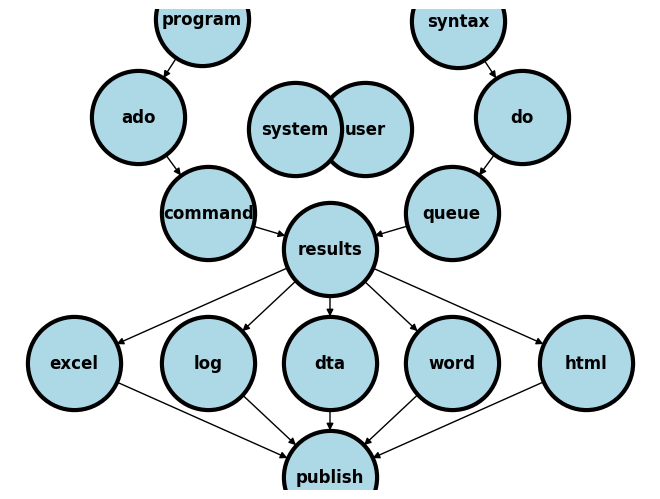

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
#import sklearn as skl
# 

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("user",  pos = (550,500) )
G.add_node("system",  pos = (-550,500) )
G.add_node("program",  pos = (-2000, 960) )
G.add_node("syntax",  pos = (2000, 950) )
G.add_node("ado", pos = (-3000, 550) )
G.add_node("do", pos = (3000, 550) )
G.add_node("command", pos = (-1900, 150) )
G.add_node("queue", pos = (1900, 150) )
G.add_node("results", pos = (0,0))
G.add_node("dta", pos = (0, -475))
G.add_node("log", pos = (-1900, -475))
G.add_node("excel", pos = (-4000, -475))
G.add_node("word", pos = (1900, -475))
G.add_node("html", pos = (4000, -475))
G.add_node("publish", pos = (0, -950))
G.add_edges_from([ ("program","ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue") ])
G.add_edges_from([("command", "results"), ("queue", "results"),("results","excel"),("results","word"),("results","html")])
G.add_edges_from([("results","dta"),("results","log")])
G.add_edges_from([("dta","publish"),("log","publish"),("excel","publish"),("word","publish"),("html","publish")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()

Results/Output
   + A sequence or queue of instructions `commands + syntax = code` given to Stata via a do-file will generate results  
   + <u>Never</u> include results in your do-file when you share your work in this class and with future collaborators
   + Due diligence in the `open-science` enterprise demands that others `reproduce` your results and findings
   + Your duty is to share <u>only</u> the `input`, and ours is to reproduce your `output` so as to fullfil our shared Credo 
   + Please share your do-files and any third-party ado-files, if at all your script or do-file relies on third-party programs      
       
Display/Files
   + .xlsx
   + .log
   + .dta
   + .docx
   + [.html](https://jhustata.github.io/livre/dyndoc.html)
   

## 2.1 xlsx

```stata
use transplants, clear 
putexcel set table1, replace
putexcel A1="Table 1. Demographic and clinical characteristics of kidney transplant recipients"
putexcel B1="N=`c(N)'"
```

## 2.2 log

```stata
log using chi2.log, replace 
use transplants
tab dx gender, row  chi2
```

```stata
. tab dx gender, row  chi2

+----------------+
Key            
------------------
frequency    
row percentage 
+----------------+

Primary            gender
Diagnosis      |    0    |    1	    | Total
---------------+---------+----------+------			
1=Glomerular   |  237    |    187   |	 424 
               |  55.90  |   44.10  | 100.00 
---------------+---------+----------+------			
2=Diabetes     | 60      |  37	    | 97 
               | 61.86   |  38.14   | 100.00 
---------------+---------+----------+------			
3=PKD          | 81      |  66	    | 147 
               | 55.10   |  44.90   | 100.00 
---------------+---------+----------+------			
4=Hypertensive | 316     |  176	    | 492 
               | 64.23   |  35.77   | 100.00 
---------------+---------+----------+------		
5=Renovascular | 24      |  15	    | 39 
               | 61.54   |  38.46   | 100.00 
---------------+---------+----------+------			
6=Congenital   | 46      |  22	    | 68 
               | 67.65   |  32.35   | 100.00 
---------------+---------+----------+------				
7=Tubulo       | 32      |  35	    | 67 
               | 47.76   |  52.24   | 100.00 
---------------+---------+----------+------			
8=Neoplasm     | 8       |  5	    | 13 
               | 61.54   |  38.46   | 100.00 
---------------+---------+----------+------			
9=Other        | 421     |  232	    | 653 
               | 64.47   |  35.53   | 100.00 
---------------+---------+----------+------			
Total          | 1,225   |  775     | 2,000 
               | 61.25   |  38.75   | 100.00 

Pearson chi2(8) =  18.4805	Pr	= 0.018

. 

```

If you review your log-file you'll find results similar to those above. But these are not in the typical format seen in peer-reviewed work. For instance, p-values are usually reported in a format that depends on their exact value:

```stata
return list 
qui {
    if r(p) < 0.01 {
	   local p: di "p < 0.01"
    }
    else if inrange(r(p),0.01,0.05) {
	   local p: di %3.2f r(p)
    }
    else {
	   local p: di %2.1f r(p)
    }
	noi di "p = `p'"
}
```

```stata
. return list 

scalars:
r(N) =  2000
r(r) =  9
r(c) =  2
r(chi2) =  18.48047641017726
r(p) =  .0178990677414798

. qui {
p = 0.02
```

We'll stop here for purposes of introducing the log-file as one of the file formats used to store output and results from analyes. Let's close the file now. 

```stata
log close 
```

```stata
. log close
name:  <unnamed>
log:  /Users/d/Desktop/chi2.log
log type:  text
closed on:  20 Jun 2023, 05:46:13
	

--------------------------------------------------------------
```

[chi2.log](https://raw.githubusercontent.com/jhustata/livre/main/chi2.log)

## 2.3 dta

```stata
cls
clear 
postutil clear 
postfile pp str80 a float(b c) using output.dta, replace 
post pp ("1") (24.4) (123)
post pp ("2") (31.5) (164)
post pp ("3") (29.0) (118)
postclose pp

use output, clear 
list 
```

```stata
. clear 

. postutil clear 

. postfile pp str80 a float(b	c)	using	output.dta,	replace 

. post pp ("1") (24.4) (123)

. post pp ("2") (31.5) (164)

. post pp ("3") (29.0) (118)

. postclose pp

. 
. use output, clear 

. list 


    a      b     c 
__________________
1.  1   24.4   123 
2.  2   31.5   164 
3.  3     29   118 



. 
end of do-file

. 

```

## 2.4 docx

We may embed Stata results in a .docx file in two very distinct ways:
   + putdocx
   + dyndoc

### 2.4.1. Putdocx

+ putdocx begin (Tell Stata you want to create a Word doc)
+ putdocx text etc. (Define the contents of the Word doc you will create)
+ putdocx save (Actually create the Word doc and write it to disk)


```stata
putdocx clear
putdocx begin
putdocx paragraph
putdocx text ("How to embed Stata results in .docx")
putdocx paragraph
putdocx text ("Author, MD MPH")
putdocx paragraph
putdocx text ("Background. A user downloads and installs a system of program files, mostly ado-files, which form the foundation of most of the commands used in Stata Programming. Using those commands and additional syntax written out sequentially in a do-file, the user creates well-formed instruction to Stata called a do-file script. Once the user runs this script, results are generated and displayed in the results window, in a graph, or in a format (.xlsx, .log, .dta, .docx, .md, LaTeX, .html, etc). The .docx file format is of specific interest to us right now. To illustrate how this may be achieved in Stata, we hereby introduce the putdocx command.")
putdocx paragraph
putdocx text ("Methods. We created a do-file and populated it with this abstract using plain text. Results that might be numeric, string, alphanumeric, or formatted as macros are manually embeded in the text. We then saved this document using the file extension .do; however, any text file extension will work (.txt, .md, .do, etc). In the key analysis, Y = b0 + b1X, where Y is life expectancy at birth in years, the outcome or dependent variable; X is the country, the predictor or independent variable being tested.")
putdocx paragraph
putdocx text ("Results. We identified the newly created .html file in our folder and opened it to compare its format to this markdown file. And we saw all that we had made, and behold, it was very good. Ghastly macros in the original markdown language now appeared as neatly formatted results. There were 68 observations and 6 observations in the analyzed dataset. Average life expectancy of all countries, b0, was 72 years. Difference in life expectancy among adjacent countries, b1, showed no trend or pattern and was 0.002 year, essentially zero, and p=0.95")
putdocx paragraph
putdocx text ("Conclusion. In walking you through syntax, do-file creation, queued commands, generated results, through to embedding neatly formatted output in .html, we believe you now have a solid sense of all that Stata has to offer you. These ideas can be generalized to embedding results in .xlsx, .log, .dta, .docx, etc.")
putdocx save myfirst.docx, replace
```


       
      
Author, MD MPH        
      
Background. A user downloads and installs a system of program files, mostly ado-files, which form the foundation of most of the commands used in Stata Programming. Using those commands and additional syntax written out sequentially in a do-file, the user creates well-formed instruction to Stata called a do- file script. Once the user runs this script, results are generated and displayed in the results window, in a graph, or in a format (.xlsx, .log, .dta, .docx, .md, LaTeX, .html, etc). The .docx file format is of specific interest to us right now. To illustrate how this may be achieved in Stata, we hereby introduce the putdocx command.     
     
Methods. We created a do-file and populated it with this abstract using plain text. Results that might be numeric, string, alphanumeric, or formatted as macros are manually embeded in the text. We then saved this document using the file extension .do; however, any text file extension will work (.txt, .md, .do, etc). In the key analysis, Y = b0 + b1X, where Y is life expectancy at birth in years, the outcome or dependent variable; X is the country, the predictor or independent variable being tested.     
     
Results. We identified the newly created .html file in our folder and opened it to compare its format to this markdown file. And we saw all that we had made, and behold, it was very good. Ghastly macros in the original markdown language now appeared as neatly formatted results. There were 68 observations and 6 observations in the analyzed dataset. Average life expectancy of all countries, b0, was 72 years. Difference in life expectancy among adjacent countries, b1, showed no trend or pattern and was 0.002 year, essentially zero, and p=0.95     
     
Conclusion. In walking you through syntax, do-file creation, queued commands, generated results, through to embedding neatly formatted output in .html, we believe you now have a solid sense of all that Stata has to offer you. These ideas can be generalized to embedding results in .xlsx, .log, .dta, .docx, etc.     

### 2.4.2. dyndoc
   + Identical to the .html approach discussed in the next section
   + But has some caveats that we will discuss
   + Word documents are not able to render LaTeX format



#### Author, MD MPH

**Background:** 
A <u>user</u> downloads and installs a <u>system</u> of program files, mostly ado-files, which form the foundation of most of the commands 
used in Stata Programming. Using those commands and additional syntax written out sequentially in a do-file, the user creates 
well-formed instruction to Stata called a do-file script. Once the user runs this script, results are generated and displayed
in the results window, in a graph, or in a format (`.xlsx`, `.log`, `.dta`, `.docx`, `.md`, `LaTeX`, `.html`, etc). The `.docx` file format is of specific 
interest since its the one of the most widely used word processors. To illustrate how this may be achieved in Stata, we hereby introduce the `dyndoc`
command. 

**Methods:** 
We created a [do-file](https://raw.githubusercontent.com/jhustata/livre/main/filename.do) and populated it with this abstract using [markdown](https://en.wikipedia.org/wiki/Markdown) language. Anything 
in this document that is not ordinary text including `<<dd_version: 2>>`, `<<dd_do:nooutput>>`, `<</dd_do>>`, `<<dd_display: c(N)>>` is a 
[markup](https://en.wikipedia.org/wiki/Markup_language#:~:text=A%20markup%20language%20is%20a,content%20to%20facilitate%20automated%20processing.). 
Results that might be numeric, string, alphanumeric, or formatted as macros are embeded at these markedup points. We then saved this 
document using the file extension .do; however, any text file extension will work (.txt, .md, .do, etc). To the `pwd` where we saved
this text file, we added a cascading style sheet [stmarkdown.css](https://raw.githubusercontent.com/jhustata/livre/main/stmarkdown.css) and [header.txt](https://raw.githubusercontent.com/jhustata/livre/main/header.txt) to enhance the aesthetic of our .html file. Finally, we typed the 
following command into the Stata command window: `dyndoc filename.do, saving(filename.docx) replace`. In the key analysis, $Y  = \beta_0   +  \beta_1 X$, where $Y$ is life expectancy at birth in years, the outcome or dependent variable; $X$ is the country, the predictor or independent variable being tested.  

```stata
. webuse lifeexp, clear 
(Life expectancy, 1998)

. encode country, gen(Country)

. quietly sum lexp

. qui local lexp_mean: di %3.0f r(mean) 

. quietly sum Country

. qui local Country_mean: di r(mean)  

. twoway scatter lexp Country, ///
>    xscale(off) ///
>    yline(`lexp_mean', ///
>       lc(red) ///
>       lp(dash) ///
>    ) ///
>    text(`lexp_mean' `Country_mean' "Mean life expectancy among countries")

. graph export lexp_bycountry.png, replace 
file /Users/d/Desktop/lexp_bycountry.png saved as PNG format

. 
end of do-file

. 

```

![](lexp_bycountry.png)
      
  
```stata
. qui {

.

```

```stata
. display c(N) 
68

. display c(k)  
6

. list in 1/5  

						
    region	            country	    popgro~h	 lexp	    gnppc  safewa~r	
						
1.  Europe & C. Asia	Albania	       1.2	        72	    810	    76	
2.  Europe & C. Asia	Armenia	       1.1	        74	    460	    .	
3.  Europe & C. Asia	Austria	       .4	        79	    26830   .	
4.  Europe & C. Asia	Azerbaijan    1.4	        71	    480	    .	
5.  Europe & C. Asia	Belarus	       .3	        68	    2180    .	
						

. 
end of do-file

. 

```

**Results:** 
We identified the newly created .html file in our folder and opened it to compare its format to this markdown file. And we saw all that
we had made, and behold, it was very good. Ghastly macros in the original markdown language now appeared as neatly formatted
results. There were 68 observations and 6 observations in the analyzed dataset. Average life expectancy of all countries, $\beta_0$, was 72 years. Difference in life expectancy among <u>adjacent</u> countries, $\beta_1$, showed no trend or pattern and was 0.002 year, essentially $zero$, and $p = .95$

**Conclusions:** 
In walking you through syntax, do-file creation, queued commands, generated results, through to embedding neatly formatted output in
.html, we believe you now have a solid sense of all that Stata has to offer you. These ideas can be generalized to embedding results 
in .xlsx, .log, .dta, .docx, etc. 





## 2.5 html

### 2.5.1. How to embed Stata results in .html  

### Author, MD MPH

**Background:** 
A <u>user</u> downloads and installs a <u>system</u> of program files, mostly ado-files, which form the foundation of most of the commands 
used in Stata Programming. Using those commands and additional syntax written out sequentially in a do-file, the user creates 
well-formed instruction to Stata called a do-file script. Once the user runs this script, results are generated and displayed
in the results window, in a graph, or in a format (`.xlsx`, `.log`, `.dta`, `.docx`, `.md`, `LaTeX`, `.html`, etc). The `.html` file format is of specific 
interest since its the pathway to self-publication. To illustrate how this may be achieved in Stata, we hereby introduce the `dyndoc`
command. 

**Methods:** 
We created a [do-file](https://raw.githubusercontent.com/jhustata/livre/main/filename.do) and populated it with this abstract using [markdown](https://en.wikipedia.org/wiki/Markdown) language. Anything 
in this document that is not ordinary text including `<<dd_version: 2>>`, `<<dd_do:nooutput>>`, `<</dd_do>>`, `<<dd_display: c(N)>>` is a 
[markup](https://en.wikipedia.org/wiki/Markup_language#:~:text=A%20markup%20language%20is%20a,content%20to%20facilitate%20automated%20processing.). 
Results that might be numeric, string, alphanumeric, or formatted as macros are embeded at these markedup points. We then saved this 
document using the file extension .do; however, any text file extension will work (.txt, .md, .do, etc). To the `pwd` where we saved
this text file, we added a cascading style sheet [stmarkdown.css](https://raw.githubusercontent.com/jhustata/livre/main/stmarkdown.css) and [header.txt](https://raw.githubusercontent.com/jhustata/livre/main/header.txt) to enhance the aesthetic of our .html file. Finally, we typed the 
following command into the Stata command window: `dyndoc filename.do, saving(filename.html) replace`. In the key analysis, $Y  = \beta_0   +  \beta_1 X$, where $Y$ is life expectancy at birth in years, the outcome or dependent variable; $X$ is the country, the predictor or independent variable being tested.  

```stata
. webuse lifeexp, clear 
(Life expectancy, 1998)

. encode country, gen(Country)

. quietly sum lexp

. qui local lexp_mean: di %3.0f r(mean) 

. quietly sum Country

. qui local Country_mean: di r(mean)  

. twoway scatter lexp Country, ///
>    xscale(off) ///
>    yline(`lexp_mean', ///
>       lc(red) ///
>       lp(dash) ///
>    ) ///
>    text(`lexp_mean' `Country_mean' "Mean life expectancy among countries")

. graph export lexp_bycountry.png, replace 
file /Users/d/Desktop/lexp_bycountry.png saved as PNG format

. 
end of do-file

. 

```

![](lexp_bycountry.png)
      
  
```stata
. qui {

.

```

```stata
. display c(N) 
68

. display c(k)  
6

. list in 1/5  

						
    region	            country	    popgro~h	 lexp	    gnppc  safewa~r	
						
1.  Europe & C. Asia	Albania	       1.2	        72	    810	    76	
2.  Europe & C. Asia	Armenia	       1.1	        74	    460	    .	
3.  Europe & C. Asia	Austria	       .4	        79	    26830   .	
4.  Europe & C. Asia	Azerbaijan    1.4	        71	    480	    .	
5.  Europe & C. Asia	Belarus	       .3	        68	    2180    .	
						

. 
end of do-file

. 

```

**Results:** 
We identified the newly created .html file in our folder and opened it to compare its format to this markdown file. And we saw all that
we had made, and behold, it was very good. Ghastly macros in the original markdown language now appeared as neatly formatted
results. There were 68 observations and 6 observations in the analyzed dataset. Average life expectancy of all countries, $\beta_0$, was 72 years. Difference in life expectancy among <u>adjacent</u> countries, $\beta_1$, showed no trend or pattern and was 0.002 year, essentially $zero$, and $p = .95$

**Conclusions:** 
In walking you through syntax, do-file creation, queued commands, generated results, through to embedding neatly formatted output in
.html, we believe you now have a solid sense of all that Stata has to offer you. These ideas can be generalized to embedding results 
in .xlsx, .log, .dta, .docx, etc. 



